In [ ]:
!pip list --format=freeze > ../Build/requirements.txt

# 1. Introducción

Nos encontramos con un dataset que contiene información de ventas de casas, donde se incluye el precio de venta, información relacionada a la venta como el año y la condición y características de cada casa como el area del lote, forma del lote, entre otras.

Mediante la información de este dataset, se puede obtener las variables que pueden ser relevante al precio de venta de forma que, tanto vendedores como compradores, puedan hacer un estimado del valor esperado de venta de una determinada casa, para tomar decisiones mejor informadas en este tipo de transacciones comerciales.

De esta forma, se realizan las siguientes preguntas:
- ¿Cuál es la variable más relevante para determinar el precio de venta de una casa?
- ¿Son estás variables predictores rigurosos, es decir, su coeficiente afecta significativamente el precio de venta?

El objetivo de este proyecto será dar una respuesta a estas preguntas, usando como base el material compartido en clase y el conocimiento adquirido a lo largo de la maestría.

# 2. Descripción y limpieza del dataset

## 2.1 Instalación de módulos

Se instalan los módulos específicados en el archivo requirement.txt para la correcta ejecución del códugo a utilizar.

In [ ]:
!pip install -r ../Build/requirements.txt

## 2.1 Importación de modulos de Python a usar

Durante el proyecto se usarán los siguientes módulos:

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

## 2.2 Lectura del dataset

Se usa pandas para leer el dataset y almacenarlo en un objeto DataFrame que nos permita su manipulación con más facilidad.

In [32]:
path = '../Data/AmesHousing.csv'

df = pd.read_csv(path, delimiter=',')

## 2.3 Descripción y analisis inicial del dataset
Usamos DataFrame.info() y DataFrame.describe() para obtener una idea inicial del contenido del dataset

De info obtenemos información básica del dataset por cada columna, tal como tipo (numerico o categorico, conocida en pandas como object), nombre de cada columna y numero de datos no nulos.

Tambien obtenemos información global. Observamos que en total tenemos 82 columnas y 2930 entradas, que componen nuestro dataset.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

De 'Describe()' podemos obtener información estadistica de cada columna numerica, como cantidad (sin incluir nulos), promedio, desviación estándar, minimo, máximo y cuartiles.

Vemos que hay columnas que tienen información no relevante, como la columna order, la cual al tener un mínimo de 1 y un máximo de 2930, indica que es una columna de indice.

En nuestra columna objetivo, SalePrice, observamos un promedio de precio de venta de 180mil, con una desviación estandar de casi 80mil. El 50% de los valores están por debajo de los 160mil.

In [34]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


También imprimimos en pantalla las primeras 10 filas para obtener una idea visual del contenido del dataframe

In [35]:
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


Confirmamos nuestra teoría respecto a Order, que parece ser una columna indice, por lo cual la colocamos como indice de nuestro dataset.

In [36]:
df = df.set_index('Order')

## 2.4 Limpieza del dataset

Para la limpieza del dataset, se realizan las siguientes transformaciones:

__1. Limpieza de valores nulos__
Esta limpieza se realiza de acuerdo al tipo de dato:
* Dato numéricos: Se reemplazan los nulos con la mediana
* Datos categoricos: Se reemplaza por una nueva categoría 'No Aplica', debido a que variables como alley, fence, etc. parece indicar que se usa nan para el caso que no se encuentre el objeto por la categoría en la casa, por ejemplo, la casa no tiene cerca.

__2. Transformación logarítmica__
Aplicamos np.log1p(x) (log(1+x)) a las columnas numéricas que cumplan la siguiente condición: Todos los valores sean no negativos, y cuyo coeficiente de asimetría (skewness) sea mayor a 1 o menor que -1 (alta asimetría).

__3. Tratamiento de variables categoricas__
Aplicamos one-hot-encoding a las variables categoricas, creando tantas columnas con valores 0 y 1, de acuerdo a si aplica o no, para cada categoría. Finalmente, unimos reemplamos las columnas creadas por las originales en el dataset.

In [37]:
# =============================
# 1. Limpieza de valores nulos
# =============================
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        # Reemplazar nulos numéricos con la mediana
        df[col].fillna(df[col].median(), inplace=True)
    else:
        # Reemplazar nulos categóricos con 'Sin categoria'
        df[col].fillna("Sin categoria", inplace=True)

print("Valores nulos restantes:", df.isnull().sum().sum())

# =============================
# 2. Transformación logarítmica
# =============================
# Calcular skewness para decidir qué variables transformar
skewed = df[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewed[abs(skewed) > 1].index

print(f"\nVariables con alta asimetría (|skew| > 1): {list(skewed_features)}")

# Aplicar log(1+x) solo a variables no negativas
for col in skewed_features:
    if (df[col] >= 0).all():
        df[col] = np.log1p(df[col])

print("Transformación logarítmica aplicada a variables numéricas sesgadas.")

# =============================
# 3. Codificación de variables categóricas
# =============================
cat_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

df_final = pd.concat([df[num_cols].reset_index(drop=True), encoded_df], axis=1)

print("\nForma final del dataset:", df_final.shape)
print("Dataset limpio, sin nulos, sin outliers, con transformación log y codificación categórica.")


Valores nulos restantes: 0

Variables con alta asimetría (|skew| > 1): ['Misc Val', 'Pool Area', 'Lot Area', 'Low Qual Fin SF', '3Ssn Porch', 'Kitchen AbvGr', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch', 'Bsmt Half Bath', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'SalePrice', 'Lot Frontage', '1st Flr SF', 'BsmtFin SF 1', 'MS SubClass', 'Gr Liv Area', 'Total Bsmt SF']
Transformación logarítmica aplicada a variables numéricas sesgadas.

Forma final del dataset: (2930, 321)
Dataset limpio, sin nulos, sin outliers, con transformación log y codificación categórica.


------------------------------------------------------------------------------------------------------------
Finalmente nos queda el siguiente dataset:

In [38]:
df_final

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,3.044522,4.955827,10.366309,6,5,1960,1960,4.727388,6.461468,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,526350040,3.044522,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,526351010,3.044522,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,526353030,3.044522,4.543295,9.320181,7,5,1968,1968,0.000000,6.971669,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,527105010,4.110874,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,4.394449,3.637586,8.979417,6,6,1984,1984,0.000000,6.709304,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2926,923276100,3.044522,4.234107,9.092232,5,5,1983,1983,0.000000,5.710427,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,923400125,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2928,924100070,3.044522,4.356709,9.211440,5,5,1974,1975,0.000000,6.977281,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Y las siguientes columnas:

In [39]:
for column in df_final.columns:
    print(column)

PID
MS SubClass
Lot Frontage
Lot Area
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Mas Vnr Area
BsmtFin SF 1
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
TotRms AbvGrd
Fireplaces
Garage Yr Blt
Garage Cars
Garage Area
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Misc Val
Mo Sold
Yr Sold
SalePrice
MS Zoning_A (agr)
MS Zoning_C (all)
MS Zoning_FV
MS Zoning_I (all)
MS Zoning_RH
MS Zoning_RL
MS Zoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
Alley_Sin categoria
Lot Shape_IR1
Lot Shape_IR2
Lot Shape_IR3
Lot Shape_Reg
Land Contour_Bnk
Land Contour_HLS
Land Contour_Low
Land Contour_Lvl
Utilities_AllPub
Utilities_NoSeWa
Utilities_NoSewr
Lot Config_Corner
Lot Config_CulDSac
Lot Config_FR2
Lot Config_FR3
Lot Config_Inside
Land Slope_Gtl
Land Slope_Mod
Land Slope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neig

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 321 entries, PID to Sale Condition_Partial
dtypes: float64(308), int64(13)
memory usage: 7.2 MB


In [41]:
df_final.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
count,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,3.824262,4.201376,9.092342,6.094881,5.563140,1971.356314,1984.266553,2.073303,4.233941,...,0.081570,0.002389,0.000341,0.865529,0.064846,0.004096,0.008191,0.015700,0.823549,0.083618
std,1.887308e+08,0.693861,0.321038,0.511054,1.411026,1.111537,30.245361,20.860286,2.619556,2.979927,...,0.273755,0.048828,0.018474,0.341216,0.246297,0.063876,0.090149,0.124332,0.381268,0.276861
min,5.263011e+08,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.284770e+08,3.044522,4.110874,8.914794,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.354536e+08,3.931826,4.234107,9.152446,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.916202,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.071811e+08,4.262680,4.369448,9.354982,7.000000,6.000000,2001.000000,2004.000000,5.098337,6.599870,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.007100e+09,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Análisis Exploratorio de Datos



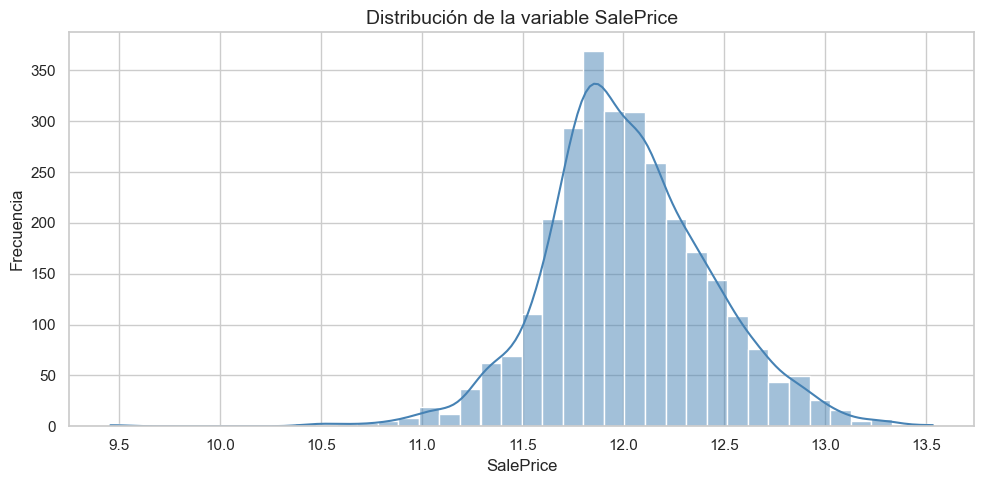

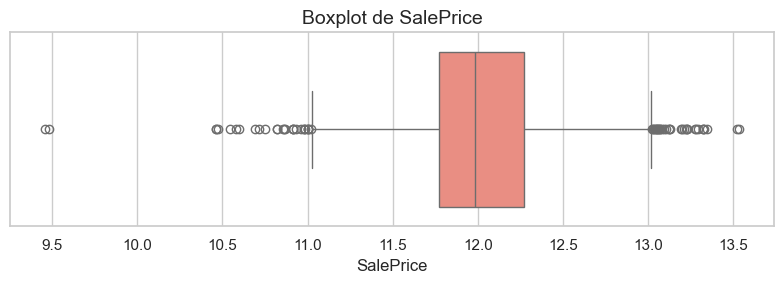

In [43]:
# =============================
# 1. Histograma de SalePrice
# =============================
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], bins=40, kde=True, color='steelblue')
plt.title("Distribución de la variable SalePrice", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# =============================
# 2. Boxplot de SalePrice
# =============================
plt.figure(figsize=(8,3))
sns.boxplot(x=df_final['SalePrice'], color='salmon')
plt.title("Boxplot de SalePrice", fontsize=14)
plt.xlabel("SalePrice")
plt.tight_layout()
plt.show()


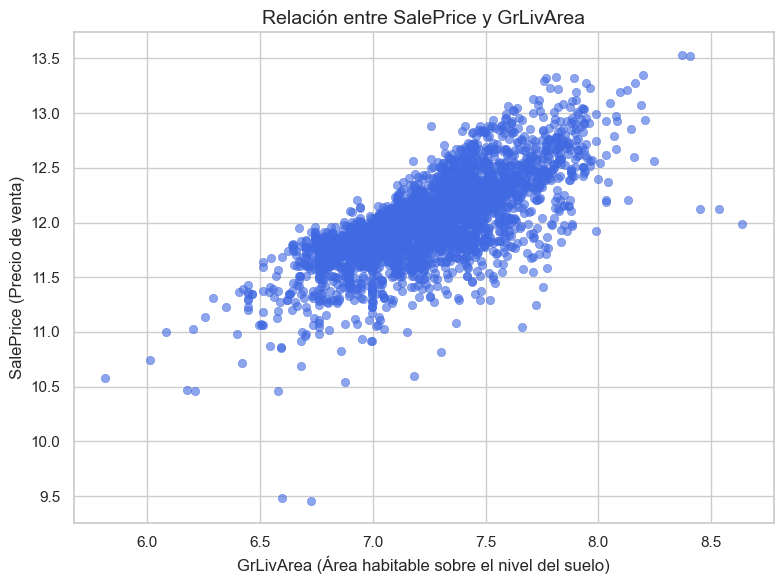

In [47]:
# =============================
# Scatter Plot
# =============================
sns.set(style="whitegrid", palette="deep")

plt.figure(figsize=(8,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_final, color='royalblue', alpha=0.6, edgecolor=None)

plt.title("Relación entre SalePrice y GrLivArea", fontsize=14)
plt.xlabel("GrLivArea (Área habitable sobre el nivel del suelo)")
plt.ylabel("SalePrice (Precio de venta)")
plt.tight_layout()
plt.show()


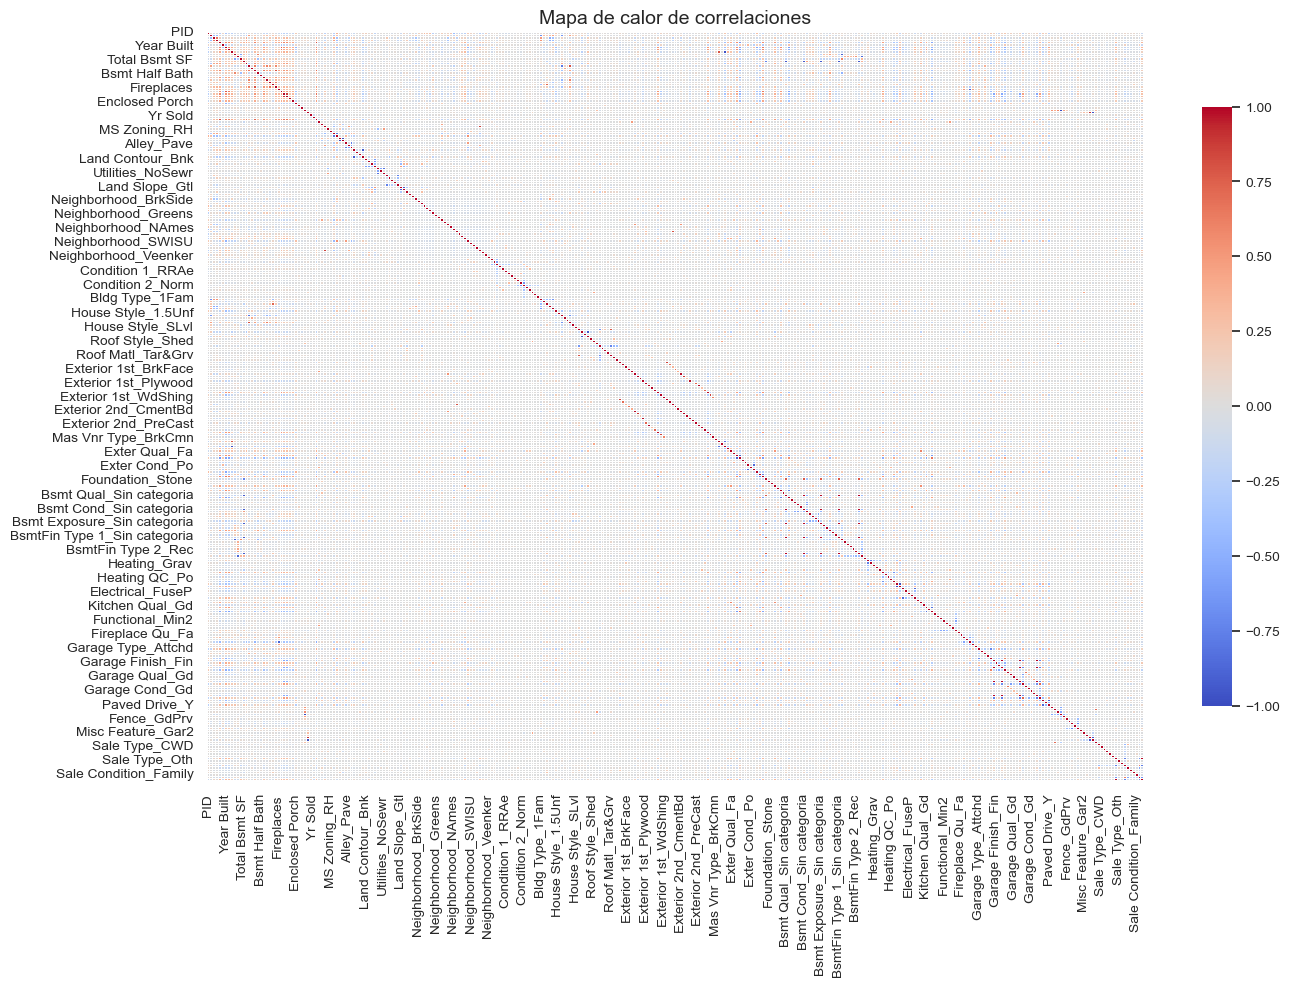

In [49]:
# =============================
# Heatmap
# =============================

corr_matrix = df_final.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.set(style="white", font_scale=0.9)

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,      # Cambia a True si quieres ver los valores numéricos
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.tight_layout()
plt.show()

In [50]:
# Mostrar las variables más correlacionadas con SalePrice
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nVariables más correlacionadas con SalePrice:")
print(target_corr.head(10))


Variables más correlacionadas con SalePrice:
SalePrice           1.000000
Overall Qual        0.825645
Gr Liv Area         0.723164
Garage Cars         0.675276
Garage Area         0.651123
Year Built          0.615485
1st Flr SF          0.613423
Year Remod/Add      0.586153
Full Bath           0.577335
Foundation_PConc    0.544291
Name: SalePrice, dtype: float64


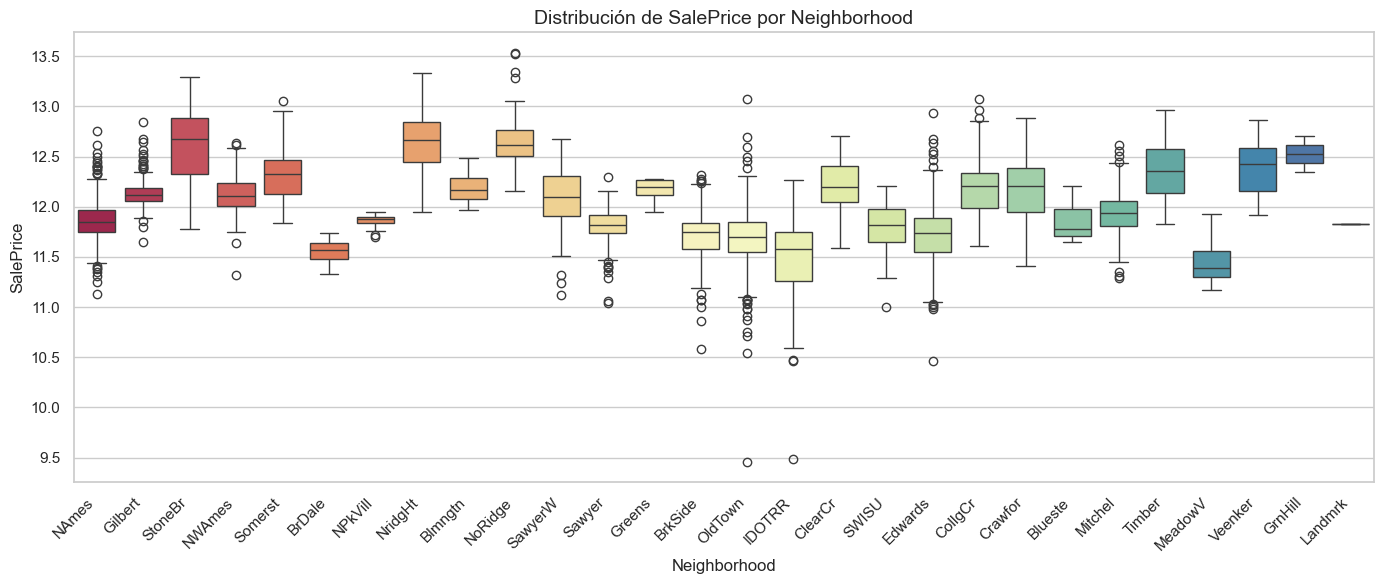

ValueError: Could not interpret value `OverallQual` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [51]:

sns.set(style="whitegrid", palette="Set2")

# =============================
# Boxplot SalePrice vs Neighborhood
# =============================
plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='Spectral')
plt.title("Distribución de SalePrice por Neighborhood", fontsize=14)
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# =============================
# Boxplot SalePrice vs OverallQual
# =============================
plt.figure(figsize=(10,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')
plt.title("Distribución de SalePrice por OverallQual", fontsize=14)
plt.xlabel("Overall Quality (Calidad general)")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()
